In [1]:
import pandas as pd
import numpy as np

# 1.Upload dataset

In [2]:
df = pd.read_csv('/content/hepatitis.csv',na_values='?')

In [3]:
df

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,1,46,1,2.0,2,1.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,152,2,44,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,153,2,61,1,1.0,2,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,154,2,53,2,1.0,2,1.0,2.0,2.0,2.0,...,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


# 2.Preprocessing

In [4]:
print(df.isnull().sum())

ID             0
target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64


In [5]:
df.fillna(df.mean() ,inplace=True)

In [6]:
print(df.isnull().sum())

ID            0
target        0
age           0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
bili          0
alk           0
sgot          0
albu          0
protime       0
histology     0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          155 non-null    int64  
 1   target      155 non-null    int64  
 2   age         155 non-null    int64  
 3   gender      155 non-null    int64  
 4   steroid     155 non-null    float64
 5   antivirals  155 non-null    int64  
 6   fatigue     155 non-null    float64
 7   malaise     155 non-null    float64
 8   anorexia    155 non-null    float64
 9   liverBig    155 non-null    float64
 10  liverFirm   155 non-null    float64
 11  spleen      155 non-null    float64
 12  spiders     155 non-null    float64
 13  ascites     155 non-null    float64
 14  varices     155 non-null    float64
 15  bili        155 non-null    float64
 16  alk         155 non-null    float64
 17  sgot        155 non-null    float64
 18  albu        155 non-null    float64
 19  protime     155 non-null    f

In [8]:
df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.000000,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,2,2,50,1,1.000000,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,3,2,78,1,2.000000,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,4,2,31,1,1.506494,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,5,2,34,1,2.000000,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1


In [9]:
df.tail()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
150,151,1,46,1,2.0,2,1.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,7.6,105.325397,242.0,3.3,50.000000,2
151,152,2,44,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,61.852273,2
152,153,2,61,1,1.0,2,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,61.852273,2
153,154,2,53,2,1.0,2,1.0,2.0,2.0,2.0,...,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2
154,155,1,43,1,2.0,2,1.0,2.0,2.0,2.0,...,1.0,1.0,1.0,2.0,1.2,100.000000,19.0,3.1,42.000000,2


In [10]:
df.shape

(155, 21)

In [11]:
df.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.800000,1.660000,1.866667,1.880000,1.427517,105.325397,85.894040,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.499958,0.362923,0.477173,0.489086,0.405727,0.366536,...,0.394771,0.467516,0.335491,0.320713,1.188301,46.405585,88.478932,0.616750,17.193528,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,102.000000,59.000000,3.900000,61.852273,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [12]:
df.columns

Index(['ID', 'target', 'age', 'gender', 'steroid', 'antivirals', 'fatigue',
       'malaise', 'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders',
       'ascites', 'varices', 'bili', 'alk', 'sgot', 'albu', 'protime',
       'histology'],
      dtype='object')

In [13]:
df['target'].value_counts()

,count
target,
2,123
1,32


In [14]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.histogram(df,x='age',title='Target Distribution on age')
fig.show()

In [15]:
df = df.drop("ID",axis=1)

In [16]:
x = df.drop('target',axis=1)
y = df['target']

In [17]:
print(x.head())

   age  gender   steroid  antivirals  fatigue  malaise  anorexia  liverBig  \
0   30       2  1.000000           2      2.0      2.0       2.0       1.0   
1   50       1  1.000000           2      1.0      2.0       2.0       1.0   
2   78       1  2.000000           2      1.0      2.0       2.0       2.0   
3   31       1  1.506494           1      2.0      2.0       2.0       2.0   
4   34       1  2.000000           2      2.0      2.0       2.0       2.0   

   liverFirm  spleen  spiders  ascites  varices  bili         alk   sgot  \
0        2.0     2.0      2.0      2.0      2.0   1.0   85.000000   18.0   
1        2.0     2.0      2.0      2.0      2.0   0.9  135.000000   42.0   
2        2.0     2.0      2.0      2.0      2.0   0.7   96.000000   32.0   
3        2.0     2.0      2.0      2.0      2.0   0.7   46.000000   52.0   
4        2.0     2.0      2.0      2.0      2.0   1.0  105.325397  200.0   

   albu    protime  histology  
0   4.0  61.852273          1  
1   3.5  6

In [18]:
print(y.head())

0    2
1    2
2    2
3    2
4    2
Name: target, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 19)
(31, 19)
(124,)
(31,)


# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Create a linear regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
train_pred_lr = model_lr.predict(x_train)
test_pred_lr = model_lr.predict(x_test)

results = pd.DataFrame({'Actual':y_train,'Predicted':train_pred_lr})
print(results)

     Actual  Predicted
108       2   1.940394
129       1   0.818075
71        1   1.461516
65        2   2.047480
122       2   1.756570
..      ...        ...
75        2   1.570177
43        2   2.086728
22        2   2.052733
72        2   1.949147
15        2   1.562218

[124 rows x 2 columns]


In [23]:
#calculate metrics
train_mae_lr = mean_absolute_error(y_train,train_pred_lr)
test_mae_lr = mean_absolute_error(y_test,test_pred_lr)
train_mse_lr = mean_squared_error(y_train,train_pred_lr)
test_mse_lr = mean_squared_error(y_test,test_pred_lr)
train_r2_lr = r2_score(y_train,train_pred_lr)
test_r2_lr = r2_score(y_test,test_pred_lr)

In [24]:
print(train_mae_lr)
print(test_mae_lr)

0.1909334165099422
0.29958369698918025


In [25]:
print(train_mse_lr)
print(test_mse_lr)

0.0669270038239191
0.20018525494874154


In [26]:
print(train_r2_lr)
print(test_r2_lr)

0.5842142986680485
-0.14510732146274163


# **SVM**

In [27]:
from sklearn.svm import SVC

#call the model
model_svm = SVC(kernel='linear',C=1,random_state=0)

#train/fit the model
model_svm.fit(x_train,y_train)

#predict from the model
y_pred_train = model_svm.predict(x_train)
y_pred_test = model_svm.predict(x_test)

In [28]:
#calculate metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

#Accuracy score
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print("Accuracy score of the model on training data: ",accuracy_train)
print("Accuracy score of the model of test data:",accuracy_test)

#confusion matrix
print(confusion_matrix(y_train,y_pred_train))

#f1 score
print("Train data f1-score:", f1_score(y_train,y_pred_train))
print("Test data f1-score", f1_score(y_test,y_pred_test))

Accuracy score of the model on training data:  0.9274193548387096
Accuracy score of the model of test data: 0.7741935483870968
[[19  6]
 [ 3 96]]
Train data f1-score: 0.8085106382978723
Test data f1-score 0.36363636363636365


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

In [30]:
#call the model
model_lr = LogisticRegression(max_iter=1000)

#train/fit the model
model_lr.fit(x_train,y_train)

#predict from the model
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

In [31]:
print(y_pred_train)
print(y_pred_test)

[2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1
 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 1 2 2 1 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2]


In [32]:
#calculate metrics
#Accuracy score
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Accuracy score of the model on training data: ",accuracy_train)

accuracy_test = accuracy_score(y_test,y_pred_test)
print("Accuracy score of the model of test data:",accuracy_test)

#confusion matrix
confusion_matrix(y_train,y_pred_train)

Accuracy score of the model on training data:  0.9354838709677419
Accuracy score of the model of test data: 0.7419354838709677


array([[18,  7],
       [ 1, 98]])

In [33]:
tn,fp,fn,tp = confusion_matrix(y_train,y_pred_train).ravel()
print("TP",tp)
print("TN",tn)
print("FP",fp)
print("FN",fn)

TP 98
TN 18
FP 7
FN 1


In [34]:
recall_score = tp/(tp+fn)
print("Recall score of the logistic regression is: ",recall_score)
precision = tp/(tp+fp)
print("Precision score of the logistic regression is: ",precision)
F1_score = 2*(recall_score*precision)/(recall_score+precision)
print("F1 score of the logistic regression is: ",F1_score)

Recall score of the logistic regression is:  0.98989898989899
Precision score of the logistic regression is:  0.9333333333333333
F1 score of the logistic regression is:  0.9607843137254903


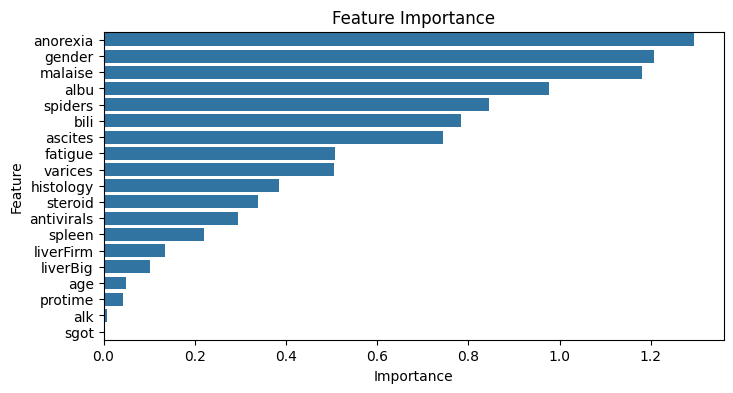

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance (Logistic Regression)
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': abs(model_lr.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

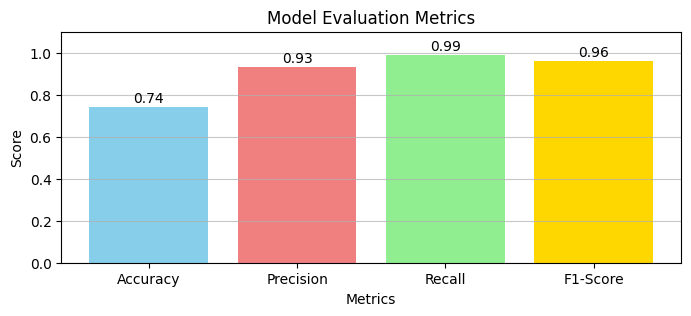

In [37]:
metrics = {'Accuracy': accuracy_test, 'Precision': precision, 'Recall': recall_score, 'F1-Score': F1_score}
# Create the bar plot
plt.figure(figsize=(8, 3))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='-', alpha=0.7)

for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.show()